# Nearest Neighbors Exercises

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

## Problem 1

Consider the following simple dataset:

<img src="https://raw.githubusercontent.com/MedlyticsUniversal/Data/main/Images/example_table.png" alt="Example Table" width="600">

Now consider the sample:

#### $X=4, Y=4, Z=2$

Using KNN, what is the class for this sample for $k = 1$ and $k = 3?$ Use the Eucledian metric.

In [3]:
s1 = np.array([5, 4, 3])
s2 = np.array([1, 2, 2])
s3 = np.array([1, 2, 3])
stest = np.array([4, 4, 2])

print(f"Euclidean distance from sample 1 to test sample {np.linalg.norm(s1 - stest)}")
print(f"Euclidean distance from sample 2 to test sample {np.linalg.norm(s2 - stest)}")
print(f"Euclidean distance from sample 3 to test sample {np.linalg.norm(s3 - stest)}")

Euclidean distance from sample 1 to test sample 1.4142135623730951
Euclidean distance from sample 2 to test sample 3.605551275463989
Euclidean distance from sample 3 to test sample 3.7416573867739413


> Answer: k=1: class 1, k=3: class 2

## Problem 2
Earlier in the tutorial we were told that KNN depends on several factors, one of them being $k$. Consider the following datasets below, and find the optimal value of $k$ that yields the highest accuracy. Visualize your data! Can you come up with some rule for getting a good idea of what $k$ is?

HINT: look for a pattern/bound! Answer should be in terms of the size of the dataset $n$.

In [5]:
# Solve this problem for each of these datasets
from sklearn.datasets import load_iris 
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_wine 

# Load those datasets into some easily accessible variables
# The datasets are already normalized, so that saves us some steps!
iris = load_iris()                    #iris dataset: size = 150
breast_cancer = load_breast_cancer()  #diabetes dataset: size = 569
wine = load_wine()                    #wine dataset: size 178

# This function will perfom KNN classification for a specified k
def split_train_test_dataset(dataset, k, test_size=0.2):
    """Loads and performs KNN classification on the provided dataset"""
    # Grab and split the dataset
    X_train, X_val, y_train, y_val = train_test_split(
        dataset.data, dataset.target, test_size=test_size, random_state=0)

    # Build a KNN classifier, fit it and test its predictions
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    print("Validation Accuracy is {:5.1%}".format(
        accuracy_score(y_val, knn.predict(X_val))))

print(iris['DESCR'])
print(breast_cancer['DESCR'])
print(wine['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
for ds, name in zip([iris, breast_cancer, wine], ['iris, n = 150', 'breast_cancer, n = 569', 'wine, n = 178']):
    for k in range(1, 20):
        print(f"Dataset: {name}, k={k}\t", end="")
        split_train_test_dataset(ds, k)

Dataset: iris, n = 150, k=1	Validation Accuracy is 100.0%
Dataset: iris, n = 150, k=2	Validation Accuracy is 96.7%
Dataset: iris, n = 150, k=3	Validation Accuracy is 96.7%
Dataset: iris, n = 150, k=4	Validation Accuracy is 100.0%
Dataset: iris, n = 150, k=5	Validation Accuracy is 96.7%
Dataset: iris, n = 150, k=6	Validation Accuracy is 100.0%
Dataset: iris, n = 150, k=7	Validation Accuracy is 100.0%
Dataset: iris, n = 150, k=8	Validation Accuracy is 100.0%
Dataset: iris, n = 150, k=9	Validation Accuracy is 100.0%
Dataset: iris, n = 150, k=10	Validation Accuracy is 100.0%
Dataset: iris, n = 150, k=11	Validation Accuracy is 100.0%
Dataset: iris, n = 150, k=12	Validation Accuracy is 100.0%
Dataset: iris, n = 150, k=13	Validation Accuracy is 100.0%
Dataset: iris, n = 150, k=14	Validation Accuracy is 100.0%
Dataset: iris, n = 150, k=15	Validation Accuracy is 100.0%
Dataset: iris, n = 150, k=16	Validation Accuracy is 100.0%
Dataset: iris, n = 150, k=17	Validation Accuracy is 100.0%
Dataset: 

Text(0, 0.5, 'petal width (cm)')

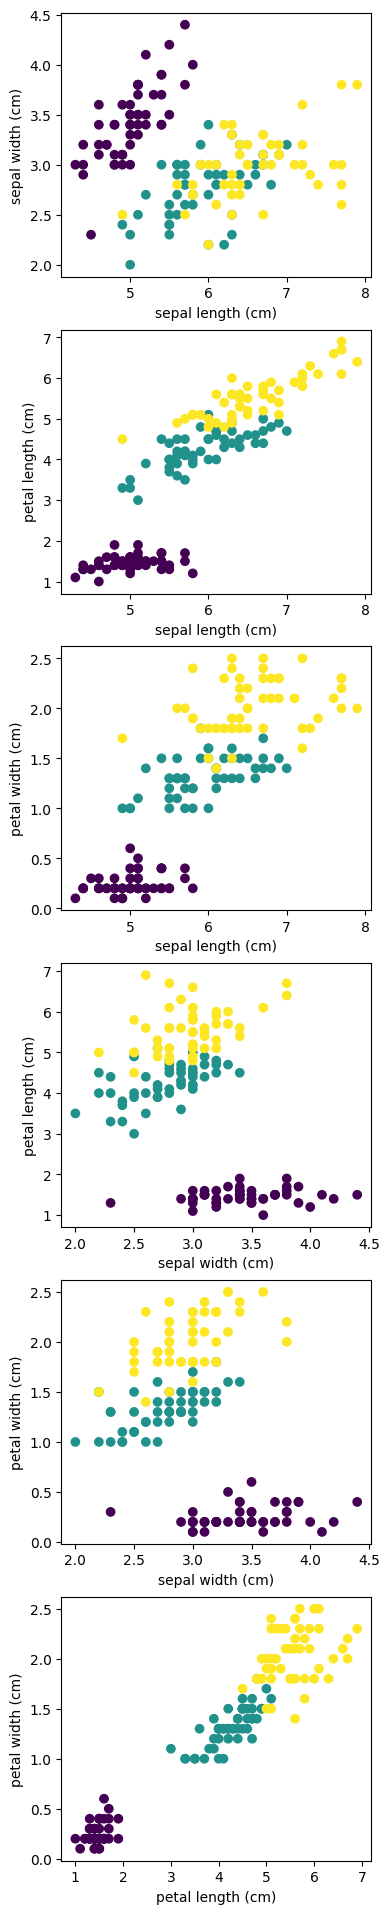

In [10]:
fig, axes = plt.subplots(6, figsize=(4,24))
axes[0].scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
axes[0].set_xlabel(iris.feature_names[0])
axes[0].set_ylabel(iris.feature_names[1])
axes[1].scatter(iris.data[:, 0], iris.data[:, 2], c=iris.target)
axes[1].set_xlabel(iris.feature_names[0])
axes[1].set_ylabel(iris.feature_names[2])
axes[2].scatter(iris.data[:, 0], iris.data[:, 3], c=iris.target)
axes[2].set_xlabel(iris.feature_names[0])
axes[2].set_ylabel(iris.feature_names[3])
axes[3].scatter(iris.data[:, 1], iris.data[:, 2], c=iris.target)
axes[3].set_xlabel(iris.feature_names[1])
axes[3].set_ylabel(iris.feature_names[2])
axes[4].scatter(iris.data[:, 1], iris.data[:, 3], c=iris.target)
axes[4].set_xlabel(iris.feature_names[1])
axes[4].set_ylabel(iris.feature_names[3])
axes[5].scatter(iris.data[:, 2], iris.data[:, 3], c=iris.target)
axes[5].set_xlabel(iris.feature_names[2])
axes[5].set_ylabel(iris.feature_names[3])

In [12]:
from sklearn import linear_model
x = [150, 178, 569]
x = np.array(x)
y = [4, 5 ,9]
y = np.array(y)
m = linear_model.LinearRegression()
m.fit(x.reshape(-1, 1), y)
print(m.coef_[0])
print(m.intercept_)

0.01119899400411875
2.6515007927684935


Write a single mathematical expression describing the relationship you found between $n$ (the size of the dataset) and $k$ (the number of datapoints used to classify each validation datum).

> Answer: k = 0.01119899400411875n + 2.6515007927684935

## Problem 3
Now, we will **be writing our k-NNA**. Recall that we said a KNN is comprised of predictions and using those predictions to classify the data. Here, we will try to mimic sklearn's KNN methods. We will be using the Pima diabetes dataset.

### Loading and splitting data

In [14]:
url = "https://raw.githubusercontent.com/MedlyticsUniversal/Data/main/Week1/diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(url, names=names)

# Dropping NaN rows
invalid = ['plas', 'pres', 'skin', 'test', 'mass']

for i in invalid:
    data[i].replace(to_replace=0, value=np.nan, inplace=True)
    
data = data.dropna(axis=0).reset_index(drop=True)

Now, let's clearly define which columns will act as explanatory variables and which column will be the target value. Then, split the dataset between your training data and testing data. Let's try an 80-20 split and use sklearn's [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) method (set random_state = 0 so we get the same output each time).

In [16]:
# Columns we will use to make predictions with (features!) feel free to play around with these
X_cols = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']

# Column that we want to predict (the labels)
y_col = 'class'

# 80-20 train-test split of datset
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(data[X_cols], data[y_col], test_size=test_size, random_state=0)

# Further split X and y of training into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size, random_state=0)

print('There are {} training samples with {} features and {} associated classification labels'.format(*X_train.shape, *y_train.shape))
print('There are {} validation samples with {} features and {} associated classification labels'.format(*X_val.shape, *y_val.shape))
print('There are {} test samples with {} features and {} associated classification labels'.format(*X_test.shape, *y_test.shape))

There are 250 training samples with 8 features and 250 associated classification labels
There are 63 validation samples with 8 features and 63 associated classification labels
There are 79 test samples with 8 features and 79 associated classification labels


### Normalizing Data

Let's not forget to normalize the data! We'll use sklearn's `StandardScaler`'s z-score normalization like we did before to normalize the training **and** validation data.

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

for i in list(X_train):
    feature_data_train = X_train[i].values.reshape(-1, 1)
    scaler.fit(feature_data_train)
    X_train[i] = scaler.transform(feature_data_train)

for j in list(X_test):
    feature_data_test = X_test[j].values.reshape(-1, 1)
    scaler.fit(feature_data_test)
    X_test[j] = scaler.transform(feature_data_test)
    
for k in list(X_val):
    feature_data_val = X_val[k].values.reshape(-1, 1)
    scaler.fit(feature_data_val)
    X_val[k] = scaler.transform(feature_data_val)

### Writing your KNN

Now for the fun part! Fill in the 3 following methods: `euclidean_dist()`, `predict()`, and `knn()`.

The `predict()` method that we'll make below needs to: 
1. Compute the Euclidean distance between the “new” observation and all the data points in the training set. 
2. Assign the corresponding label to the observation.
3. Select the `k` nearest data points and perform a "majority vote."

In [54]:
# Euclidean distance function from tutorial
def euclidean_dist(datum1, datum2):
    within_sqrt = 0.0
    
    for g in range(datum1.shape[0]):
        within_sqrt += (datum1[g]- datum2[g]) ** 2
    
    distance = np.sqrt(within_sqrt)
    return(distance)

In [149]:
from collections import Counter

def predict(x_training, y_training, x_test_sample, k):
    
    # Create list for distances and targets
    distances = np.array([])
    targets = np.array([])
    x_training = x_training.to_numpy()
    y_training = y_training.to_numpy()

    for i in range(len(x_training)):
        distances = np.append(distances, euclidean_dist(x_test_sample, x_training[i]))
        targets = np.append(targets, y_training[i])

    p = distances.argsort()
    distances = distances[p]
    targets = targets[p]

    distances = distances[:k]
    targets = targets[:k]
    
    d = Counter(targets)
    prediction = d.most_common(1)[0][0]

    return prediction

In [150]:
def knn(x_training, y_training, x_testing, k):
    predictions = []
    x_testing = x_testing.to_numpy()

    for x in x_testing:
        predictions.append(predict(x_training, y_training, x, k))
    
    return predictions

When done, test your code by running the methods here!

In [151]:
from sklearn.metrics import accuracy_score
import time

start = time.time()
predictions_slow = knn(X_train, y_train, X_val, k=5)

print(predictions_slow)
print('Took {} seconds'.format(time.time() - start))
print("Validation Accuracy is ", accuracy_score(y_val,predictions_slow)*100)

[1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0]
Took 0.2990601062774658 seconds
Validation Accuracy is  80.95238095238095


Check sklearn's predictions on validation data from the tutorial notebook and make sure they match yours. Sklearn is faster, but you should get the same answers.

In [ ]:
# same, both 80.95238095238095

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0cca5f50-39f8-471d-8735-226387513f26' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>